In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Pairwise

In [147]:
def effective_pop_size_pairwise(t1, t2, N, Ud, s):
    """
    t1 and t2 can be vectors
    """
    t1 = np.maximum(t1, -1)
    t2 = np.maximum(t2, -1)
    
    prob_coal = 1/N * np.exp(Ud/s * (1 - np.exp(-s * t1)) * (1 - np.exp(-s * t2)))
    
    # support negative times
    Ne = np.where((t1 >= 0) & (t2 >= 0), 1/prob_coal, np.nan)
    
    return Ne
    
 
    

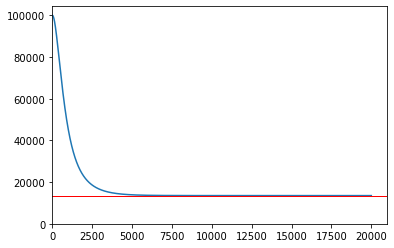

In [148]:
N = 1e5
s = 1e-3
Ud = s * 2

t1 = np.arange(0, 20000)
t2 = np.arange(0, 20000)

Ne = effective_pop_size_pairwise(t1, t2, N, Ud, s)

plt.plot(Ne)
plt.xlim(0, None)
plt.ylim(0, None)
plt.axhline(N * np.exp(-Ud/s), color="red", lw=1)

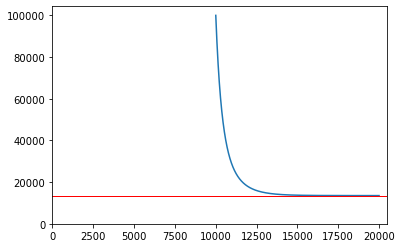

In [149]:
N = 1e5
s = 1e-3
Ud = s * 2

t1 = np.arange(0, 20000)
t2 = np.concatenate([-np.ones(10000), np.arange(0, 20000-10000)])

Ne = effective_pop_size_pairwise(t1, t2, N, Ud, s)

plt.plot(Ne)
plt.xlim(0, None)
plt.ylim(0, None)
plt.axhline(N * np.exp(-Ud/s), color="red", lw=1)

## All

In [170]:
import itertools
import scipy.special

def effective_pop_size_all(times, N, Ud, s):
    n_timepoints, n_lineages = times.shape
    n_lineage_pairs = int(scipy.special.binom(n_lineages, 2))
    
    all_prob_coals = np.zeros((n_timepoints, n_lineage_pairs))
    
    for k, (i,j) in enumerate(itertools.combinations(range(n_lineages), 2)):
        all_prob_coals[:, k] = 1 / effective_pop_size_pairwise(times[:,i], times[:,j], N, Ud, s)
        
    prob_coal = np.nansum(all_prob_coals, axis=1)
    n_live_lineages = (times >= 0).astype(int).sum(axis=1)
    
    with np.errstate(divide='ignore', invalid='ignore'):
        Ne = np.where(prob_coal > 0, 1 / prob_coal * scipy.special.binom(n_live_lineages, 2), np.nan)
    
    return all_prob_coals, prob_coal, n_live_lineages, scipy.special.binom(n_live_lineages, 2), Ne
        
    
    
    

(0.0, 104323.32357823242)

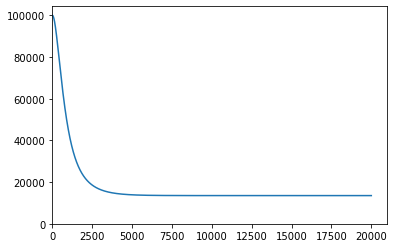

In [151]:
N = 1e5
s = 1e-3
Ud = s * 2

times = np.tile(np.arange(0, 20000), (5, 1)).T

Ne = effective_pop_size_all(times, N, Ud, s)

plt.plot(Ne)
plt.xlim(0, None)
plt.ylim(0, None)

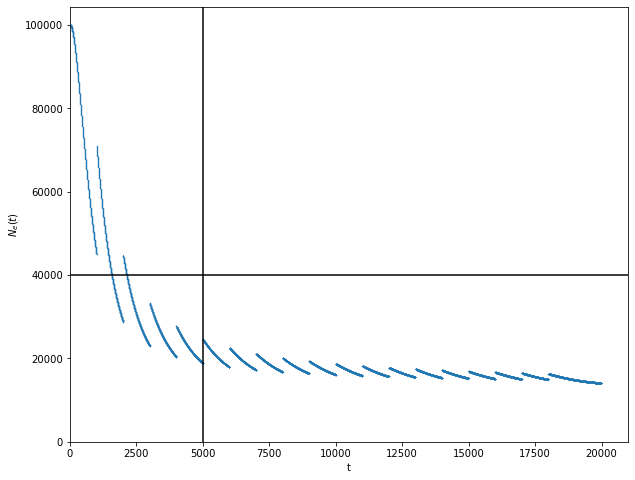

In [172]:
N = 1e5
s = 1e-3
Ud = s * 2

times = np.tile(np.arange(0, 20000), (20, 1)).T
tip_ages = np.concatenate([[0], np.arange(19)*1000])
for i in range(20):    
    times[:,i] -= tip_ages[i]

all_prob_coals, prob_coal, n_live_lineages, n_live_lineages_pairs, Ne = effective_pop_size_all(times, N, Ud, s)

plt.figure(figsize=(10,8))
plt.plot(Ne, '.', ms=0.5)
plt.xlim(0, None)
plt.ylim(0, None)
plt.xlabel("t")
plt.ylabel("$N_e(t)$")
plt.axhline(40000, color="black")
plt.axvline(5000, color="black")

In [169]:
Ne[999:1002]

array([45012.83877252, 71028.50754281, 70951.24754005])

In [174]:
n_live_lineages_pairs[999:1002]

array([1., 3., 3.])

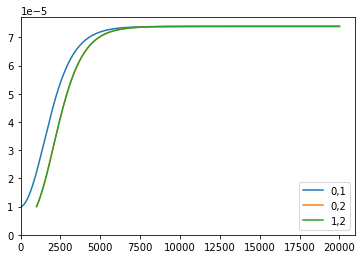

In [191]:
plt.plot(all_prob_coals[:,0], label="0,1")
plt.plot(all_prob_coals[:,1], label="0,2")
plt.plot(all_prob_coals[:,19], label="1,2")
plt.xlim(0,None)
plt.ylim(0,None)
plt.legend()

In [203]:
scipy.stats.binom(17, 0.03).pmf(0)

0.5958260438588049